Explanation: The following work can be broken down into three components: 
1. Transformers and Article Loading - we load in articles using the newspaper library and process them through a transformer to get a score. In the first few cells we test this out.
2. LSTMs, RNNs, and Ensemble - we build out models for LSTM, RNN, and do an ensemble of the LSTM and RNN.
3. EDA - we perform exploratory data analysis to get a better understanding of the information we are working with.
4. Finalized Transfomer processing -we process a series of articles and calculate their scores.

Transformers and Article Loading (Tests)

In [ ]:
#work starts here
!pip install newspaper3k
!pip install summarizer

In [ ]:
!pip install bert-extractive-summarizer
!pip install spacy

from newspaper import Article, build
from summarizer import Summarizer
import spacy




In [ ]:
from newspaper import Article, build
from summarizer import Summarizer
import spacy
def summarize_article(url):
  article = Article(url)
  article.download()
  article.parse()
  article_text = article.text
  #summarizer = Summarizer()
  #summary = summarizer(article_text) - weird bug here - not sure what's going on but it is a non-important bug
  #summarizer = Summarizer()
  #summary = summarizer(article_text)
  return article_text
#article_url = "https://www.bbc.com/news"
article_url = "https://www.economist.com/business/2022/10/24/the-end-of-apples-affair-with-china"
x = summarize_article(article_url)

In [ ]:
#Note - GPT was used to help construct this code so similar code may be used here
nlp = spacy.load("en_core_web_sm")
def semantic_analysis(text):
  doc = nlp(text)
  for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Lemma: {token.lemma_}")
  print("\nSentences and Sentiment:")
  for sentence in doc.sents:
      print(f"Sentence: {sentence.text}")
      print(f"Sentiment: {sentence.sentiment}")
  return 1
semantic_analysis("happy")




Token: happy, POS: ADJ, Dependency: ROOT, Lemma: happy

Sentences and Sentiment:
Sentence: happy
Sentiment: 0.0


1

In [ ]:

!pip install transformers
import numpy as np

In [ ]:
#Transformer 1 - base transformer using bert for sentiment analysis
#Note GPT was used to help write this code to advance class concept of RNNs
from transformers import pipeline

def analyze_sentiment_bert(text):
    # Load pre-trained BERT model for sentiment analysis
    sentiment_analyzer = pipeline('sentiment-analysis')

    # Perform sentiment analysis
    result = sentiment_analyzer(text)[0]

    # Extract sentiment label and score
    sentiment_label = result['label']
    sentiment_score = result['score']

    return sentiment_label, sentiment_score

# Example text for sentiment analysis
def transformer_analysis(x):
  example_text = x
  doc = nlp(example_text)
  for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Lemma: {token.lemma_}")
    print("\nSentences and Sentiment:")
    result = []
    neg_count = 0
    pos_count = 0
    for sentence in doc.sents:
      print(f"Sentence: {sentence.text}")
      print(f"Sentiment: {sentence.sentiment}")
      result_bert, score_bert = analyze_sentiment_bert(str(sentence))
      print(f"Predicted Sentiment (BERT): {result_bert} with confidence: {score_bert:.4f}")
    if result_bert == "POSITIVE":
      result.append(score_bert)
      pos_count += 1
    else:
      result.append(score_bert * -1)
      neg_count += 1
  sentiment_score = np.mean(result) #calculate the sentiment per sentence
  total_counts = pos_count - neg_count #if negative helps us to see a negative sentiment
  print(sentiment_score)
  print(total_counts)
#transformer_analysis(x)
"""
example_text = x
doc = nlp(example_text)
for token in doc:
  print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Lemma: {token.lemma_}")
  print("\nSentences and Sentiment:")
result = []
neg_count = 0
pos_count = 0
for sentence in doc.sents:
  print(f"Sentence: {sentence.text}")
  print(f"Sentiment: {sentence.sentiment}")
  result_bert, score_bert = analyze_sentiment_bert(str(sentence))
  print(f"Predicted Sentiment (BERT): {result_bert} with confidence: {score_bert:.4f}")
  if result_bert == "POSITIVE":
    result.append(score_bert)
    pos_count += 1
  else:
    result.append(score_bert * -1)
    neg_count += 1
sentiment_score = np.mean(result) #calculate the sentiment per sentence
total_counts = pos_count - neg_count #if negative helps us to see a negative sentiment
print(sentiment_score)
print(total_counts)
"""


# Perform sentiment analysis using BERT-based model

#result_bert, score_bert = analyze_sentiment_bert(example_text)
#print(f"Predicted Sentiment (BERT): {result_bert} with confidence: {score_bert:.4f}")


'\nexample_text = x\ndoc = nlp(example_text)\nfor token in doc:\n  print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Lemma: {token.lemma_}")\n  print("\nSentences and Sentiment:")\nresult = []\nneg_count = 0\npos_count = 0\nfor sentence in doc.sents:\n  print(f"Sentence: {sentence.text}")\n  print(f"Sentiment: {sentence.sentiment}")\n  result_bert, score_bert = analyze_sentiment_bert(str(sentence))\n  print(f"Predicted Sentiment (BERT): {result_bert} with confidence: {score_bert:.4f}")\n  if result_bert == "POSITIVE":\n    result.append(score_bert)\n    pos_count += 1\n  else:\n    result.append(score_bert * -1)\n    neg_count += 1\nsentiment_score = np.mean(result) #calculate the sentiment per sentence\ntotal_counts = pos_count - neg_count #if negative helps us to see a negative sentiment\nprint(sentiment_score)\nprint(total_counts)\n'

In [ ]:
#split cell

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Apple, POS: PROPN, Dependency: nsubj, Lemma: Apple

Sentences and Sentiment:
Sentence: Apple marked a grim milestone this week, falling about $1 trillion below a peak reached in 2022.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9989
Sentence: The company's shares rallied in recent days, but the massive loss in value reflects difficult economic times for companies across the tech industry and beyond.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9983
Sentence: The tech-heavy Nasdaq plummeted by about one-third in 2022 while the broader S &P 500 fell 19% over that period.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9994
Sentence: Apple's performance, meanwhile, fell right in between those two indexes, dropping 27% over the course of the year.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9984
Sentence: The decline of a longstanding stalwart like Apple highlights trends that thrust the U.S. economy into uncertainty in 2022, leaving it in a precarious position as the new year begins, analysts told ABC News.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9818
Sentence: The forces that have squeezed Apple and the wider economy include a shift from pandemic-era consumption that flipped the fortunes of companies large and small, a near-historic rise in inflation that triggered an aggressive response from the Federal Reserve and supply chain disruptions that eased but persisted with zero-COVID lockdowns in China, analysts said.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9708
Sentence: "You're talking about $1 trillion wiped out from the economy in one stock – it's a big number and it isn't something that should be ignored," Angelo Zino, senior industry analyst at CFRA Research, told ABC News.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): POSITIVE with confidence: 0.9977
Sentence: Apple did not immediately respond to a request for comment.


Sentiment: 0.0


KeyboardInterrupt: ignored

In [ ]:
#Adjusting transformer to speed it up with summarization at play
import random
def transformer_analysis(x):
  example_text = x
  doc = nlp(example_text)
  for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Lemma: {token.lemma_}")
    print("\nSentences and Sentiment:")
    result = []
    neg_count = 0
    pos_count = 0
    sentences = list(doc.sents)
    num_samples = .25 * len(sentences)
    num_samples = round(num_samples)
    sampled_sentences = random.sample(sentences, k=num_samples)
    count = 0
    for sentence in sampled_sentences:
      #print(f"Sentence: {sentence.text}")
      #print(f"Sentiment: {sentence.sentiment}")
      result_bert, score_bert = analyze_sentiment_bert(str(sentence))
      #print(f"Predicted Sentiment (BERT): {result_bert} with confidence: {score_bert:.4f}")
      count += 1
      #print("COUNT" + str(count))
    if result_bert == "POSITIVE":
      result.append(score_bert)
      pos_count += 1
    else:
      result.append(score_bert * -1)
      neg_count += 1
    if count == num_samples:
      break
  sentiment_score = np.mean(result) #calculate the sentiment per sentence
  total_counts = pos_count - neg_count #if negative helps us to see a negative sentiment
  #print(sentiment_score)
  #print(total_counts)
  return sentiment_score
#article_url = "https://www.economist.com/business/2022/10/24/the-end-of-apples-affair-with-china"
#x = summarize_article(article_url)
#transformer_analysis(x)


In [ ]:
article_url = "https://abcnews.go.com/Business/apples-plunged-1-trillion-2022-economy/story?id=95930467"
x = summarize_article(article_url)
transformer_analysis(x)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Apple, POS: PROPN, Dependency: nsubj, Lemma: Apple

Sentences and Sentiment:
Sentence: Inflation rises and aggressive interest rate hikes follow

Apple has also faced challenges rooted in rapid price hikes and the Federal Reserve's policy response, which has slowed some areas of the economy and pummeled the stock market.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9959
COUNT1
Sentence: Supply chain bottlenecks

Like a host of companies, Apple has struggled with pandemic-imposed supply chain disruptions that have hindered production and caused delivery delays.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9995
COUNT2
Sentence: As pandemic fears have waned, however, consumers have prioritized spending on the experiences they missed out on while cooped up indoors.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9799
COUNT3
Sentence: An increase to the benchmark interest rate raises borrowing costs for consumers and businesses, which in theory should slash inflation by slowing the economy and eating away at demand.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.8512
COUNT4
Sentence: Tim Cook, chief executive officer of Apple Inc., speaks during a "First Tool-In" ceremony at the TSMC facility under construction in Phoenix, Dec. 6, 2022.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): POSITIVE with confidence: 0.9931
COUNT5
Sentence: "They get hit hard.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9930
COUNT6
Sentence: The company's shares rallied in recent days, but the massive loss in value reflects difficult economic times for companies across the tech industry and beyond.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9983
COUNT7
Sentence: "Investors are buying their stocks because of expected profit growth long into the future," he said.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.8501
COUNT8
Sentence: Apple marked a grim milestone this week, falling about $1 trillion below a peak reached in 2022.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9989
COUNT9
Sentence: Why Apple lost nearly $1 trillion in value in 2022 and what it says about the state of the U.S. economy.


Sentiment: 0.0
Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9996
COUNT10
-0.9995517134666443
-1


In [ ]:
article_url = "https://www.bbc.com/news/business-64099654"
x = summarize_article(article_url)
transformer_analysis(x)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Apple, POS: PROPN, Dependency: nsubj, Lemma: Apple

Sentences and Sentiment:
Sentence: Analysts say he now needs to rebuild investors' and board members' confidence.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9994
COUNT1
Sentence: Investors have also raised concerns about Tesla chief executive Elon Musk, who has repeatedly made controversial headlines.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.8532
COUNT2
Sentence: Some have cited his alleged distraction during this time as another reason for the fall in Tesla's share price.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9974
COUNT3
Sentence: Given the spike in Covid cases in key manufacturing hubs, analysts say production will take time to ramp up once again.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.8563
COUNT4
Sentence: The company said its revenue in November was down 11% compared with the same month in 2021.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9997
COUNT5
Sentence: "

Production delays hit Apple supplier Foxconn earlier this year following unrest at its Zhangzhou plant known as "iPhone City."
Sentiment: 0.0
Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9993
COUNT6
-0.9992597699165344
-1


In [ ]:
article_url = "https://www.cnbc.com/2023/01/11/apple-and-meta-dropped-off-glassdoors-100-best-places-to-work-list-.html"
x = summarize_article(article_url)
transformer_analysis(x)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: For, POS: ADP, Dependency: prep, Lemma: for

Sentences and Sentiment:
Sentence: CNBC Make It's Jennifer Liu reported that, according to a survey of 1,179 U.S Meta workers on Blind from Nov. 10 to 11, 31% of remaining employees said they would recommend their employer to a friend, and 55% believe the company acted with care during the layoff.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9968
COUNT1
Sentence: Last year, Meta was ranked #47, a significant decline from its #11 spot in 2021.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9266
COUNT2
Sentence: But according to new data from Glassdoor, both tech giants no longer stand out the way they once did.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9990
COUNT3
Sentence: As Glassdoor releases its 100 Best Places to Work report of 2023, both companies are absent from the list.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9997
COUNT4
Sentence: Despite $1B in ticket sales, some Indigenous people take issue with 'Avatar 2'—here's why

39-year-old self-made millionaire: 'Success isn't owned, it's rented.
Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): NEGATIVE with confidence: 0.9909
COUNT5
Sentence: This drop off has made way for newcomers to join the Best Places to Work List, including Spotify, the Lego Group, and Gainsight.


Sentiment: 0.0


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Predicted Sentiment (BERT): POSITIVE with confidence: 0.9991
COUNT6
Sentence: And then for Meta, they are undergoing a significant strategic shift.
Sentiment: 0.0
Predicted Sentiment (BERT): POSITIVE with confidence: 0.9709
COUNT7
0.9708886742591858
1


LSTMs and RNNs
Note: We also test out a transformer

In [ ]:
!pip install yfinance
!pip install tensorflow

In [ ]:

!pip install torch torchvision
!pip install pandas numpy scikit-learn matplotlib
!pip install tensorflow
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.9 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
12/12 [==============================] - 32s 100ms/step - loss: 0.1313
Epoch 2/100
12/12 [==============================] - 1s 76ms/step - loss: 0.0474
Epoch 3/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0375
Epoch 4/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0301
Epoch 5/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0243
Epoch 6/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0236
Epoch 7/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0230
Epoch 8/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0220
Epoch 9/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0218
Epoch 10/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0219
Epoch 11/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0219
Epoch 12/100
12/12 [==========

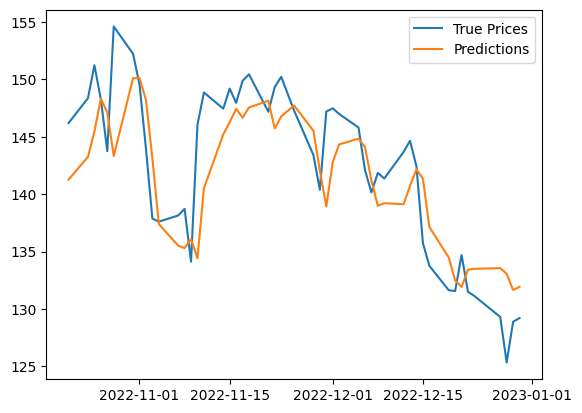

In [ ]:
#Deep LSTM model to predict stocks
#GPT was used to help write this code per class concepts already derived
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date)

data = apple_stock['Adj Close'].values.reshape(-1,1)


scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

sequence_length = 10
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100,return_sequences = True))
model.add(LSTM(units=100, return_sequences = True))
model.add(LSTM(units=100, return_sequences = True))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions if you scaled your data
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
import matplotlib.pyplot as plt

plt.plot(apple_stock.index[-len(y_test):], scaler.inverse_transform(y_test), label="True Prices")
plt.plot(apple_stock.index[-len(y_test):], predictions, label="Predictions")
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
12/12 [==============================] - 6s 19ms/step - loss: 0.1400
Epoch 2/10
12/12 [==============================] - 0s 22ms/step - loss: 0.0296
Epoch 3/10
12/12 [==============================] - 0s 26ms/step - loss: 0.0209
Epoch 4/10
12/12 [==============================] - 0s 26ms/step - loss: 0.0161
Epoch 5/10
12/12 [==============================] - 0s 28ms/step - loss: 0.0145
Epoch 6/10
12/12 [==============================] - 0s 19ms/step - loss: 0.0144
Epoch 7/10
12/12 [==============================] - 0s 19ms/step - loss: 0.0140
Epoch 8/10
12/12 [==============================] - 0s 20ms/step - loss: 0.0133
Epoch 9/10
12/12 [==============================] - 0s 18ms/step - loss: 0.0129
Epoch 10/10
2/2 [==============================] - 2s 18ms/step - loss: 0.0140
Test Loss: 0.013972346670925617


2/2 [==============================] - 1s 11ms/step
Mean Squared Error: 41.675876303672155


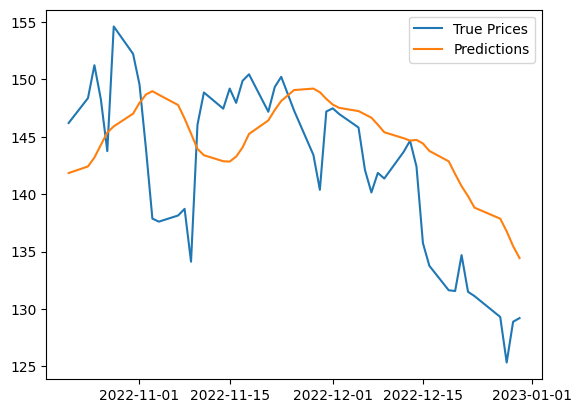

In [ ]:
#Generic LSTM model to predict stocks
#GPT was used to help write this code per class concepts already derived
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date)

data = apple_stock['Adj Close'].values.reshape(-1,1)


scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

sequence_length = 10
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)
y_pred_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Inverse transform predictions if you scaled your data
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
import matplotlib.pyplot as plt

plt.plot(apple_stock.index[-len(y_test):], scaler.inverse_transform(y_test), label="True Prices")
plt.plot(apple_stock.index[-len(y_test):], predictions, label="Predictions")
plt.legend()
plt.show()

In [ ]:
#DO SOME EDA ON THE DATA
#May want to integrate ensemble learning to generalize the information and account for overfitting
#Explain parts of code and add documentation - whatever looks confusing

[*********************100%%**********************]  1 of 1 completed
[[[1.        ]
  [0.95818159]
  [0.87164778]
  ...
  [0.88269071]
  [0.82222603]
  [0.83815662]]

 [[0.95818159]
  [0.87164778]
  [0.81878589]
  ...
  [0.82222603]
  [0.83815662]
  [0.77895898]]

 [[0.87164778]
  [0.81878589]
  [0.82186394]
  ...
  [0.83815662]
  [0.77895898]
  [0.71432998]]

 ...

 [[0.35378932]
  [0.31263838]
  [0.19045986]
  ...
  [0.11270982]
  [0.10597314]
  [0.07265158]]

 [[0.31263838]
  [0.19045986]
  [0.15422508]
  ...
  [0.10597314]
  [0.07265158]
  [0.        ]]

 [[0.19045986]
  [0.15422508]
  [0.11525926]
  ...
  [0.07265158]
  [0.        ]
  [0.06500409]]]
Epoch 1/20
6/6 [==============================] - 3s 152ms/step - loss: 0.1547 - val_loss: 0.0214
Epoch 2/20
6/6 [==============================] - 0s 36ms/step - loss: 0.0711 - val_loss: 0.0043
Epoch 3/20
6/6 [==============================] - 0s 44ms/step - loss: 0.0184 - val_loss: 0.0106
Epoch 4/20
6/6 [=============================

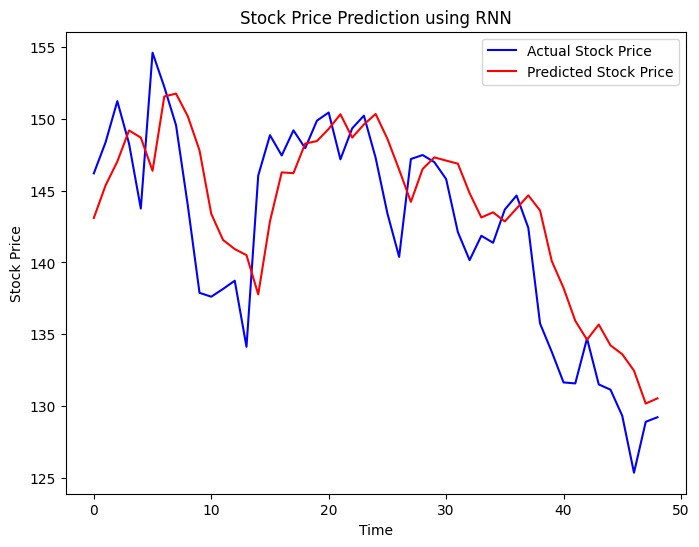

In [ ]:
#RNN
#GPT was used to help write this code per class concepts already derived
!pip install yfinance tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date)

data = apple_stock['Adj Close'].values.reshape(-1,1)

# Function to create sequences for training the RNN
def create_sequences(data, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_data_normalized = scaler.fit_transform(data)

# Create sequences for training the RNN
sequence_length = 10  # You can adjust this parameter
X, y = create_sequences(stock_data_normalized, sequence_length)
print(X)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(y_test_original, label='Actual Stock Price', color='blue')
plt.plot(y_pred_original, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
9/9 [==============================] - 0s 8ms/step


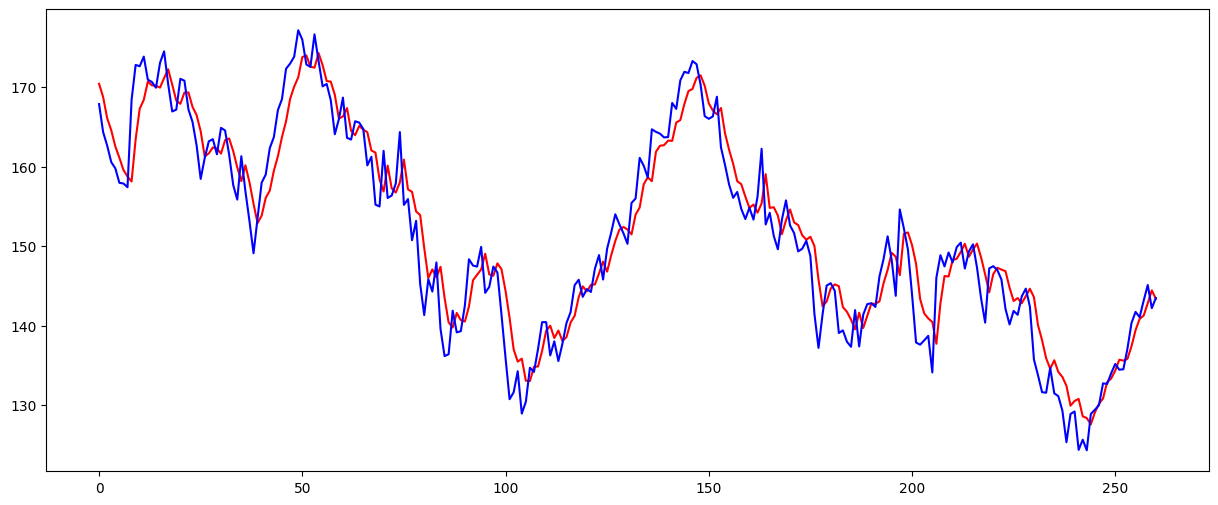

In [ ]:
#predictions going forward for RNN model - looks reasonable
symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-02-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date)

data = apple_stock['Adj Close'].values.reshape(-1,1)
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_data_normalized = scaler.fit_transform(data)

# Create sequences for training the RNN
sequence_length = 10  # You can adjust this parameter
X, y = create_sequences(stock_data_normalized, sequence_length)
y_pred = model.predict(X)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y.reshape(-1, 1))
plt.figure(figsize=(15, 6))
plt.plot(y_pred_original, label='Predicted Stock Price', color='red')
plt.plot(y_test_original, label='Actual Stock Price', color='blue')

Epoch 1/20
6/6 [==============================] - 3s 97ms/step - loss: 0.3764 - val_loss: 0.1041
Epoch 2/20
6/6 [==============================] - 0s 27ms/step - loss: 0.3696 - val_loss: 0.1004
Epoch 3/20
6/6 [==============================] - 0s 30ms/step - loss: 0.3628 - val_loss: 0.0967
Epoch 4/20
6/6 [==============================] - 0s 32ms/step - loss: 0.3561 - val_loss: 0.0932
Epoch 5/20
6/6 [==============================] - 0s 29ms/step - loss: 0.3496 - val_loss: 0.0897
Epoch 6/20
6/6 [==============================] - 0s 46ms/step - loss: 0.3430 - val_loss: 0.0863
Epoch 7/20
6/6 [==============================] - 0s 23ms/step - loss: 0.3366 - val_loss: 0.0830
Epoch 8/20
6/6 [==============================] - 0s 24ms/step - loss: 0.3303 - val_loss: 0.0798
Epoch 9/20
6/6 [==============================] - 0s 41ms/step - loss: 0.3240 - val_loss: 0.0766
Epoch 10/20
6/6 [==============================] - 0s 43ms/step - loss: 0.3180 - val_loss: 0.0735
Epoch 11/20
6/6 [============

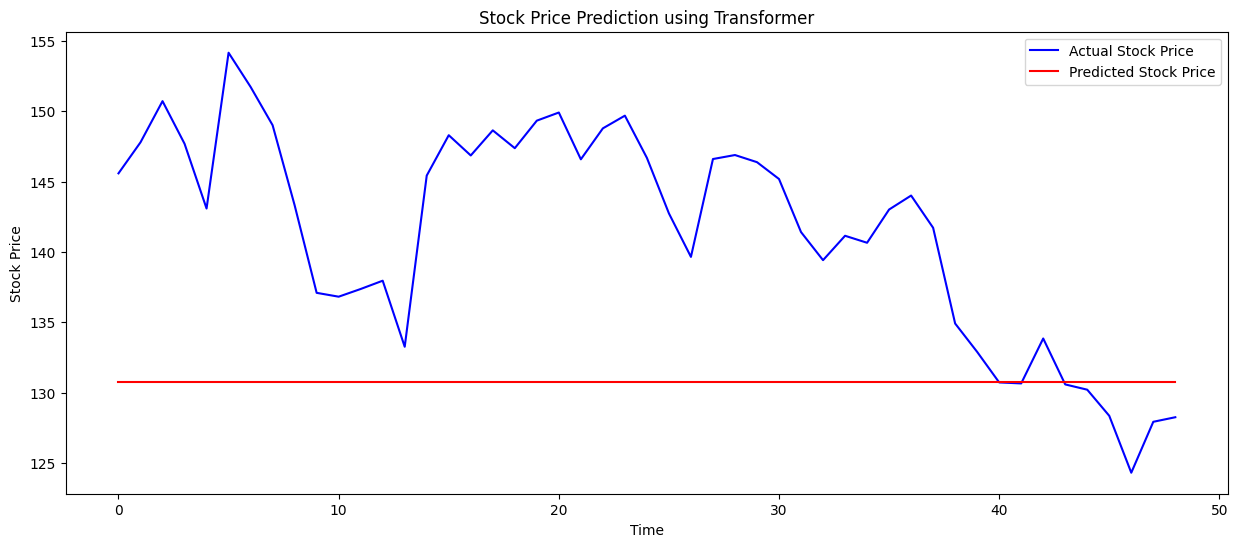

In [ ]:
# Build the Transformer model using TensorFlow
#GPT was used to help write this code per class concepts already derived
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, Dropout, LayerNormalization, Flatten
from tensorflow.keras.models import Model

def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=4)(inputs, inputs)
    x = Dropout(0.1)(x)
    res = LayerNormalization(epsilon=1e-6)(x + inputs)
    x = Flatten()(res)
    x = Dense(64, activation='relu')(x)
    x = Dense(1)(x)
    model = Model(inputs, x)
    return model
model = transformer_model(input_shape=(sequence_length, 1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Actual Stock Price', color='blue')
plt.plot(y_pred_original, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using Transformer')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Exploratory Data Analysis

In [ ]:
!pip install yfinance tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date)

data = apple_stock['Adj Close'].values.reshape(-1,1)
apple_stock


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225067,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127075,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400


In [ ]:
apple_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,153.523795,8.791038e+07
std,13.063034,12.937389,13.108058,13.056081,12.774159,2.365699e+07
min,127.989998,129.949997,125.870003,126.040001,125.339409,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,143.656754,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,152.767532,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,164.352913,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,179.953873,1.826020e+08


In [ ]:
print(apple_stock.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


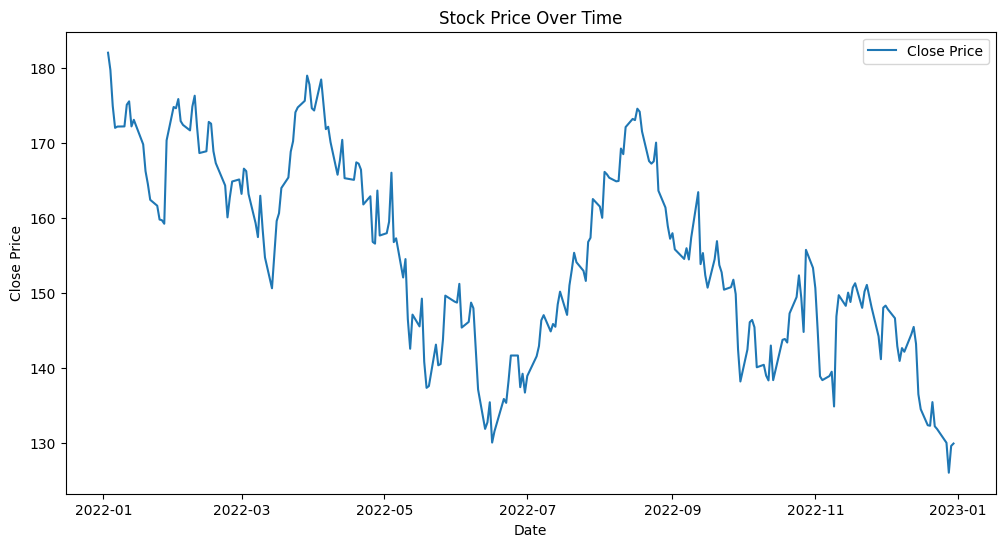

In [ ]:
# Plotting stock prices
plt.figure(figsize=(12, 6))
plt.plot(apple_stock['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

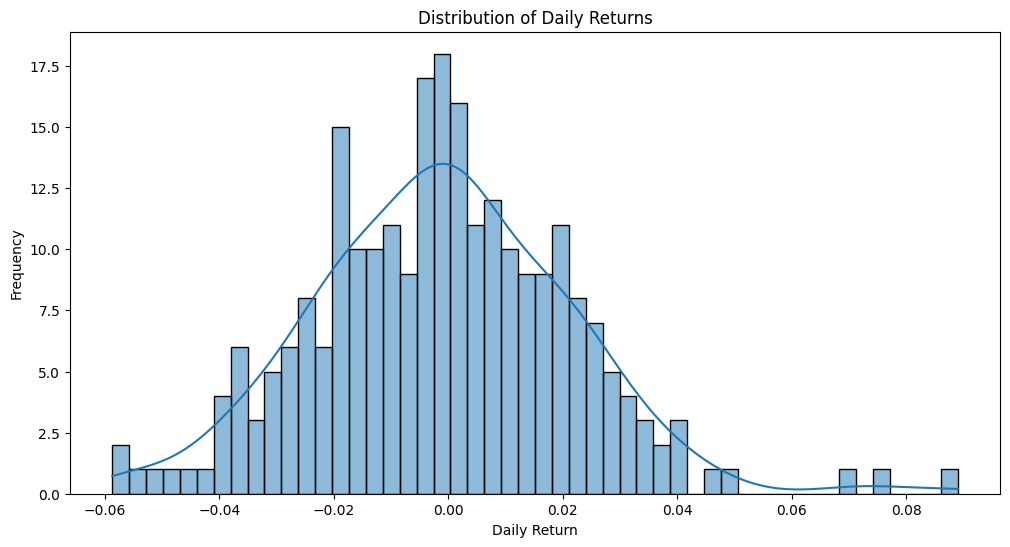

In [ ]:
# Calculate daily returns
import seaborn as sns
apple_stock['Daily_Return'] = apple_stock['Close'].pct_change()

# Plotting distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(apple_stock['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

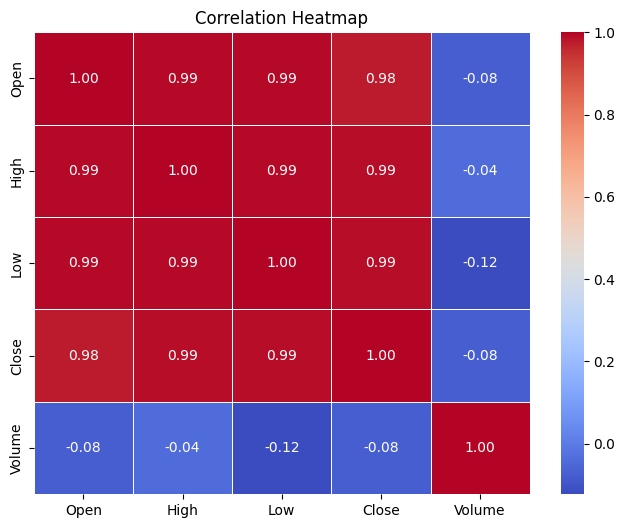

In [ ]:
# Example: Correlation heatmap
correlation_matrix = apple_stock[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Ensemble Model of RNN and LSTM

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
6/6 [==============================] - 5s 276ms/step - loss: 0.2422 - val_loss: 0.1385
Epoch 2/100
6/6 [==============================] - 0s 82ms/step - loss: 0.1179 - val_loss: 0.0377
Epoch 3/100
6/6 [==============================] - 0s 89ms/step - loss: 0.0302 - val_loss: 0.0334
Epoch 4/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0277 - val_loss: 0.0085
Epoch 5/100
6/6 [==============================] - 0s 81ms/step - loss: 0.0187 - val_loss: 0.0122
Epoch 6/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0193 - val_loss: 0.0080
Epoch 7/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0153 - val_loss: 0.0088
Epoch 8/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0144 - val_loss: 0.0076
Epoch 9/100
6/6 [==============================] - 0s 41ms/step - loss: 0.0141 - val_loss: 0.0076
Epoch 10/100
6/6 [==============================

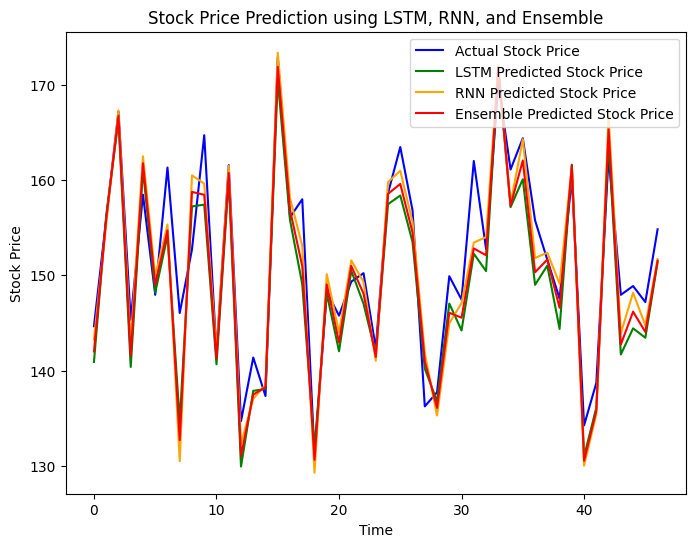

In [ ]:
#Ensemble
#GPT was used to help write this code per class concepts already derived
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download(symbol, start=start_date, end = end_date)

data = apple_stock['Adj Close'].values.reshape(-1,1)
scaler = MinMaxScaler()
stock_data_normalized = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)
# Create sequences for training the models
sequence_length = 20  # You can adjust this parameter
X, y = create_sequences(stock_data_normalized, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


# RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the models
epochs = 100  # You can adjust this parameter
lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)
rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

lstm_predictions = lstm_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)

# Inverse transform the predictions and actual values
lstm_pred_original = scaler.inverse_transform(lstm_predictions)
rnn_pred_original = scaler.inverse_transform(rnn_predictions)
y_test_original = scaler.inverse_transform(y_test)
#Idea - fine tune with MSE error rates - doing so makes ensemble match almost perfectly
mse_lstm = mean_squared_error(y_test_original, lstm_pred_original)
mse_rnn = mean_squared_error(y_test_original, rnn_pred_original)
total_mse = mse_lstm + mse_rnn
lstm_weight = mse_lstm/total_mse
rnn_weight = mse_rnn/total_mse
#Ensemble Predictions
ensemble_predictions = lstm_weight * lstm_predictions + rnn_weight * rnn_predictions
ensemble_pred_original = scaler.inverse_transform(ensemble_predictions)




# Calculate Mean Squared Error on the test set for each model and the ensemble
mse_lstm = mean_squared_error(y_test_original, lstm_pred_original)
mse_rnn = mean_squared_error(y_test_original, rnn_pred_original)
mse_ensemble = mean_squared_error(y_test_original, ensemble_pred_original)

print(f'Mean Squared Error (LSTM): {mse_lstm}')
print(f'Mean Squared Error (RNN): {mse_rnn}')
print(f'Mean Squared Error (Ensemble): {mse_ensemble}')

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(y_test_original, label='Actual Stock Price', color='blue')
plt.plot(lstm_pred_original, label='LSTM Predicted Stock Price', color='green')
plt.plot(rnn_pred_original, label='RNN Predicted Stock Price', color='orange')
plt.plot(ensemble_pred_original, label='Ensemble Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using LSTM, RNN, and Ensemble')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Integrate in Sentiment analysis and the article parsing and also try more ensemble


In [ ]:
#Make sure results apply to a specific stakeholder and extract from EDA and what's interesting that you found

Article Processing

In [ ]:
urls = ['https://www.benzinga.com/government/20/06/16223418/tech-stocks-and-faangs-strong-again-to-start-day-as-market-awaits-fed',
 'https://www.benzinga.com/analyst-ratings/price-target/20/06/16220539/10-biggest-price-target-changes-for-wednesday',
 'https://www.benzinga.com/short-sellers/20/06/16220099/benzinga-pros-top-5-stocks-to-watch-for-wed-jun-10-2020-aapl-bac-nio-sono-glw',
 'https://www.benzinga.com/news/20/06/16219873/deutsche-bank-maintains-buy-on-apple-raises-price-target-to-350',
 'https://www.benzinga.com/news/20/06/16218697/apple-to-let-users-turn-in-their-mac-computers-for-credit-at-us-canada-stores-starting-this-month-re',
 'https://www.benzinga.com/news/20/06/16218615/big-tech-reaches-new-record-heights-at-the-stock-market',
 'https://www.benzinga.com/news/20/06/16215446/why-apples-stock-is-trading-higher-today',
 'https://www.benzinga.com/news/20/06/16214115/apple-could-announce-in-house-chips-for-macs-at-wwdc-report',
 'https://www.benzinga.com/wiim/20/06/16214320/apple-shares-are-trading-higher-despite-market-weakness-not-currently-seeing-company-specific-news-i',
 'https://www.benzinga.com/m-a/20/06/16213381/sonos-shares-spike-to-session-high-now-up-9-5-as-citrons-andrew-left-currently-interviewing-on-fox-b',
 'https://www.benzinga.com/news/20/06/16161103/apple-is-tracking-iphones-stolen-by-looters-earlier-ny-post-article',
 'https://www.benzinga.com/m-a/20/06/16156730/moneygram-shares-jump-50-as-western-union-reportedly-looks-for-acquisition',
 'https://www.benzinga.com/analyst-ratings/analyst-color/20/06/16158083/hearing-susquehanna-check-suggests-total-iphone-12-builds-tracking-to-10m-below-fir',
 'https://www.benzinga.com/news/20/06/16156648/tesla-ceo-musk-says-other-three-officers-should-be-charged-in-floyds-murder-case',
 'https://www.benzinga.com/news/earnings/20/06/16157378/a-peek-into-the-markets-us-stock-futures-up-crude-oil-rises-over-2',
 'https://www.benzinga.com/news/20/06/16156515/pepper-spray-books-on-racism-i-cant-breathe-merchandise-are-top-sellers-on-amazon-as-protests-rage',
 'https://www.benzinga.com/news/20/06/16156462/apple-cuts-iphone-prices-in-china-to-push-sales-as-country-reopens-economy',
 'https://www.benzinga.com/news/20/06/16150247/gun-security-stocks-trade-higher-after-weekend-protests-turn-violent-and-destructive',
 'https://www.benzinga.com/markets/options/20/06/16148745/carter-worth-and-mike-khouws-apple-trade',
 'https://www.benzinga.com/news/20/06/16146494/apple-pays-hacker-from-india-100-000-for-discovering-serious-sign-in-with-apple-vulnerability']

In [ ]:
res = []
for url in urls:
  article_url = url
  x = summarize_article(article_url)
  score = transformer_analysis(x)
  res.append(score)
res

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Fed, POS: PROPN, Dependency: compound, Lemma: Fed

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: by, POS: ADP, Dependency: ROOT, Lemma: by

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Never, POS: ADV, Dependency: neg, Lemma: never

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Never, POS: ADV, Dependency: neg, Lemma: never

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Apple, POS: PROPN, Dependency: compound, Lemma: Apple

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Shares, POS: NOUN, Dependency: nsubj, Lemma: share

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Apple, POS: PROPN, Dependency: compound, Lemma: Apple

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Apple, POS: PROPN, Dependency: compound, Lemma: Apple

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Never, POS: ADV, Dependency: neg, Lemma: never

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Never, POS: ADV, Dependency: neg, Lemma: never

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Never, POS: ADV, Dependency: neg, Lemma: never

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: The, POS: DET, Dependency: det, Lemma: the

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Never, POS: ADV, Dependency: neg, Lemma: never

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Tesla, POS: PROPN, Dependency: compound, Lemma: Tesla

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Pre, POS: ADJ, Dependency: amod, Lemma: pre

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Amazon, POS: PROPN, Dependency: compound, Lemma: Amazon

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Apple, POS: PROPN, Dependency: compound, Lemma: Apple

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Gun, POS: NOUN, Dependency: compound, Lemma: gun

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Token: Loading, POS: NOUN, Dependency: advcl, Lemma: loading

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Token: Apple, POS: PROPN, Dependency: compound, Lemma: Apple

Sentences and Sentiment:


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[-0.9994188547134399,
 -0.9820863008499146,
 -0.9718340039253235,
 0.9994220733642578,
 0.6491702795028687,
 -0.9832106828689575,
 0.9592236280441284,
 -0.9380918741226196,
 -0.9983818531036377,
 -0.9718340039253235,
 -0.9983818531036377,
 0.9988170862197876,
 0.9991093277931213,
 -0.9654616713523865,
 -0.9873971343040466,
 -0.9127838015556335,
 0.9796006083488464,
 0.9126085042953491,
 -0.9996455907821655,
 -0.9976407289505005]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f86dace4-c215-40df-9ea2-a63cc39cfa4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>